# Mixture Of Gaussian Implementation 

## Jaeho Kim (kjh3690@unist.ac.kr)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
from scipy.stats import multivariate_normal

In [9]:
df= pd.read_csv('./faithful.csv',index_col=0)

In [10]:
df.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [7]:
np.cov(df_np.T)

NameError: name 'df_np' is not defined

In [14]:
class MOG:
    """ Implementation of PRML(Bishop) "EM for Gaussian Mixtures" pg 438,439
    """
    def __init__(self,K,iteration=20):
        """
        k = Number of clusters
        n = Number of data points
        d = Number of features
        iteration = Number of Iterations of EM
        
        
        X = n x d array, input data    
        mu = k x d array, mean of cluster
        cov = d x d x k array, covariance of cluster
        mixing_coef = k x 1 array, mixing coefficient cluster
        N_k = n x k array, effective number of points assigned to cluster k 
        responsibility_z = n x k array , responsibility P(X|Z)
        """
        self.k= K
        self.iteration= iteration
        self.log_likelihood=[]
        
    def load_data(self,csv_path):
        X= pd.read_csv(csv_path,index_col=0)
        self.n,self.d= X.shape
        self.X = np.array(X)
        
    def initialize(self):
        self.initialize_mu()
        # We initalize the cov matrix with covariance of X and add identity matrix to avoid singluarity error.
        # If we initialize cov with np.ones or empty, singularity error will occur
        self.cov= np.repeat(np.cov(self.X.T)+ 1e-7 * np.eye(self.d),self.k).reshape(self.d,self.d,self.k)
        self.mixing_coef = np.empty([self.k,1])
        self.responsibility_z = np.empty([self.n,self.k])
    
    def initialize_mu(self):
        #Initialize mu with random point of data point
        mu= np.empty([self.k, self.d])
        for i in range(self.k):
            random_row= np.random.randint(self.n)
            mu[i]= self.X[random_row][:]
        self.mu= mu
        
    def E_step(self):
        log_likelihood= 0
        for i in range(self.n):
            sum_of_responsibility=0
            for cluster in range(self.k):
                self.responsibility_z[i,cluster]= self.mixing_coef[cluster] * (multivariate_normal.pdf(self.X[i],mean=self.mu[cluster],cov= self.cov[:,:,cluster]))
                sum_of_responsibility+= self.responsibility_z[i,cluster]
            log_likelihood+= np.log(sum_of_responsibility)
            self.responsibility_z[i]= np.divide(self.responsibility_z[i],sum_of_responsibility)
        self.N_k = np.sum(self.responsibility_z, axis=0)
        print("Log Likelihood ",-log_likelihood)
        self.log_likelihood.append(-log_likelihood)
        
    def M_step(self):

        self.mu= np.matmul(self.responsibility_z.T,self.X) / self.N_k[:,None]
        self.update_cov()
        self.N_k= self.N_k/self.n

    def classify(self,array_x):
        assert array_x.shape[1] == self.d
        predict_array=np.ones([array_x.shape[0],self.k])
        for i in range(array_x.shape[0]):
            sum_of_responsibility= 0
            for cluster in range(self.k):
                predict_array[i,cluster]= self.mixing_coef[cluster] * (multivariate_normal.pdf(array_x[i],mean=self.mu[cluster],cov= self.cov[:,:,cluster]))
                sum_of_responsibility+= predict_array[i,cluster]
            predict_array[i]= np.divide(predict_array[i],sum_of_responsibility)*100
        print("Prediction Result")
        print(predict_array)

    def update_cov(self):
        for cluster in range(self.k):
            cov_new = np.zeros((self.d,self.d,self.n))
            for i in range(self.n):
                #X_n- mu_k
                vec=(self.X[i]-self.mu[cluster]).reshape(2,1)
                cov_new[:,:,i]= self.responsibility_z[i,cluster] * np.matmul(vec,vec.T)
            self.cov[:,:,cluster]= np.sum(cov_new,axis=2) / self.N_k[cluster]


    def train(self,path):
        self.load_data(path)
        self.initialize()
        print("Initial Mu is ")
        print(self.mu)
        print("="*40)
        print(" ")
        for i in range(self.iteration):
            self.E_step()
            self.M_step()
        print(" ")
        print("="*40)
        print("Final Mu is")
        print(self.mu)
        print("="*40)
        plt.plot(self.log_likelihood)
        plt.title("Log Likelihood loss")
        print(self.N_k)
        print(" ")
        print(self.responsibility_z)
        
    

In [15]:
model= MOG(3,5)

Initial Mu is 
[[ 4.167 81.   ]
 [ 1.7   59.   ]
 [ 1.833 46.   ]]
 
Log Likelihood  196662.07519085635
Log Likelihood  196532.4502769582
Log Likelihood  196484.49737970292
Log Likelihood  196477.65071736413
Log Likelihood  196476.44965842413
 
Final Mu is
[[ 4.41371858 80.83259176]
 [ 2.57484521 65.40282148]
 [ 2.75340983 58.39619659]]
[0.47173416 0.27357655 0.25468929]
 
[[1.67539361e-01 8.20014105e-01 1.24465339e-02]
 [0.00000000e+00 7.57323603e-01 2.42676397e-01]
 [1.00142912e-02 9.29591424e-01 6.03942849e-02]
 [0.00000000e+00 9.26784244e-01 7.32157562e-02]
 [9.61508664e-01 2.23499322e-02 1.61414039e-02]
 [7.85944744e-09 1.31265357e-02 9.86873456e-01]
 [9.44413562e-01 4.17734072e-02 1.38130308e-02]
 [1.71734997e-01 8.28176214e-01 8.87882944e-05]
 [0.00000000e+00 2.95023985e-01 7.04976015e-01]
 [9.35285449e-01 5.76214904e-02 7.09306100e-03]
 [0.00000000e+00 7.25301134e-01 2.74698866e-01]
 [6.15586048e-01 3.82615597e-01 1.79835559e-03]
 [8.89598517e-01 1.61365205e-02 9.42649625e-02]


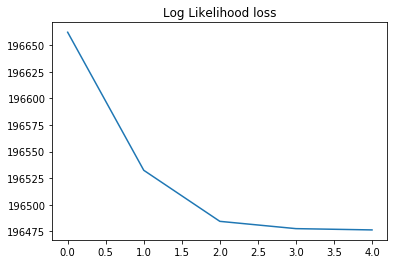

In [16]:
model.train('./faithful.csv')

In [17]:
model.classify(np.array([[3,72]]))

Prediction Result
[[6.57894178e-03 9.80288436e+01 1.96457741e+00]]
